In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# Enable inline plotting  
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
cores_per_node = {
                  '1': [1, 2, 4, 8, 16, 24, 28],
                  '2': [28, 42, 56],
                  '4': [56, 74, 102],
                  '6': [140, 154, 168],
                  '8': [196, 210, 224],
                  '12': [308, 322, 336],
                  '16': [420, 434, 448]
                  }

In [4]:
def extract_data_h5py(path_to_data, N, n):

        init_total = np.empty(3)
        init_h5py = np.empty_like(init_total)
        loop = np.empty_like(init_total)
        loop_per_frame = np.empty_like(init_total)
        io = np.empty_like(init_total)
        io_per_frame = np.empty_like(init_total)
        rmsd = np.empty_like(init_total)
        rmsd_per_frame = np.empty_like(init_total)
        comm_init = np.empty_like(init_total)
        comm_gather = np.empty_like(init_total)
        comm_total = np.empty_like(init_total)
        total = np.empty_like(init_total)

        _dict = {f'a{i}': np.load(path_to_data + f'{N}node_{i}/{n}process_times.npy') for i in range(1, 4)}

        for i, array in enumerate(_dict.values()):
            init_total[i] = np.mean(array[:, 1])
            init_h5py[i] = np.mean(array[:, 2])
            loop[i] = np.mean(array[:, 3])
            loop_per_frame[i] = np.mean(array[:, 4])
            io[i] = np.mean(array[:, 5])
            io_per_frame[i] = np.mean(array[:, 6])
            rmsd[i] = np.mean(array[:, 7])
            rmsd_per_frame[i] = np.mean(array[:, 8])
            comm_init[i] = np.mean(array[:, 9])
            comm_gather[i] = np.mean(array[:, 10])
            comm_total[i] = np.mean(array[:, 11])
            total[i] = np.mean(array[:, 12])


        means = [n, np.mean(init_total), np.mean(init_h5py), np.mean(loop), 
                 np.mean(loop_per_frame), np.mean(io), np.mean(io_per_frame), np.mean(rmsd), 
                 np.mean(rmsd_per_frame), np.mean(comm_init), np.mean(comm_gather),
                 np.mean(comm_total), np.mean(total)]
        stds = [n, np.std(init_total),  np.std(init_h5py), np.std(loop), 
                np.std(loop_per_frame), np.std(io), np.std(io_per_frame), np.std(rmsd), 
                np.std(rmsd_per_frame), np.std(comm_init), np.std(comm_gather), 
                np.std(comm_total), np.std(total)]

        return means, stds

In [5]:
def extract_data_mda(path_to_data, N, n):

    init_total = np.empty(3)
    init_top = np.empty_like(init_total)
    init_traj = np.empty_like(init_total)
    loop = np.empty_like(init_total)
    loop_per_frame = np.empty_like(init_total)
    io = np.empty_like(init_total)
    io_per_frame = np.empty_like(init_total)
    rmsd = np.empty_like(init_total)
    rmsd_per_frame = np.empty_like(init_total)
    comm_init = np.empty_like(init_total)
    comm_gather = np.empty_like(init_total)
    comm_total = np.empty_like(init_total)
    total = np.empty_like(init_total)

    _dict = {f'a{i}': np.load(path_to_data + f'{N}node_{i}/{n}process_times.npy') for i in range(1, 4)}

    for i, array in enumerate(_dict.values()):
        init_total[i] = np.mean(array[:, 1])
        init_top[i] = np.mean(array[:, 2])
        init_traj[i] = np.mean(array[:, 3])
        loop[i] = np.mean(array[:, 4])
        loop_per_frame[i] = np.mean(array[:, 5])
        io[i] = np.mean(array[:, 6])
        io_per_frame[i] = np.mean(array[:, 7])
        rmsd[i] = np.mean(array[:, 8])
        rmsd_per_frame[i] = np.mean(array[:, 9])
        comm_init[i] = np.mean(array[:, 10])
        comm_gather[i] = np.mean(array[:, 11])
        comm_total[i] = np.mean(array[:, 12])
        total[i] = np.mean(array[:, 13])

    means = [n, np.mean(init_total), np.mean(init_top), np.mean(init_traj), np.mean(loop), 
             np.mean(loop_per_frame), np.mean(io), np.mean(io_per_frame), np.mean(rmsd), 
             np.mean(rmsd_per_frame), np.mean(comm_init), np.mean(comm_gather),
             np.mean(comm_total), np.mean(total)]
    stds = [n, np.std(init_total),  np.std(init_top), np.std(init_traj), np.std(loop), 
            np.std(loop_per_frame), np.std(io), np.std(io_per_frame), np.std(rmsd), 
            np.std(rmsd_per_frame), np.std(comm_init), np.std(comm_gather), 
            np.std(comm_total), np.std(total)]

    return means, stds

In [6]:
def get_dataframe(path_to_data, N, n):
            
    _dict = {f'a{i}': np.load(path_to_data + f'{N}node_{i}/{n}process_times.npy') for i in range(1, 4)}
    arrays = tuple(_dict.values())
    a = np.hstack(arrays)
            
    dframe = pd.DataFrame(list(a), columns=3*columns)
        
    return dframe

In [63]:
def means_dataframe_h5py(path_to_data):
    
    columns = ['rank', 'init total', 'init h5py', 
            'loop', 'loop/frame', 'io', 'io/frame', 'rmsd compute', 
            'rmsd compute/frame', 'comm init', 'comm gather',
            'comm total', 'total bench']
    
    n_proc = []
    t_init_total = []
    t_init_h5py = []
    t_loop = []
    t_loop_per_frame = []
    t_io = []
    t_io_per_frame = []
    t_rmsd = []
    t_rmsd_per_frame = []
    t_comm_init = []
    t_comm_gather = []
    t_comm_total =[]
    t_total = []

    n_proc_stds = []
    t_init_total_stds = []
    t_init_h5py_stds = []
    t_loop_stds = []
    t_loop_per_frame_stds = []
    t_io_stds = []
    t_io_per_frame_stds = []
    t_rmsd_stds = []
    t_rmsd_per_frame_stds = []
    t_comm_init_stds = []
    t_comm_gather_stds = []
    t_comm_total_stds =[]
    t_total_stds = []
    
    for i in [1, 2, 4, 6, 8, 12, 16]:

        for cores in cores_per_node[f'{i}']:

            means, stds = extract_data_h5py(path_to_data, N=i, n=cores)

            n_proc.append(means[0])
            t_init_total.append(means[1])
            t_init_h5py.append(means[2])
            t_loop.append(means[3])
            t_loop_per_frame.append(means[4])
            t_io.append(means[5])
            t_io_per_frame.append(means[6])
            t_rmsd.append(means[7])
            t_rmsd_per_frame.append(means[8])
            t_comm_init.append(means[9])
            t_comm_gather.append(means[10])
            t_comm_total.append(means[11])
            t_total.append(means[12])

            n_proc_stds.append(stds[0])
            t_init_total_stds.append(stds[1])
            t_init_h5py_stds.append(stds[2])
            t_loop_stds.append(stds[3])
            t_loop_per_frame_stds.append(stds[4])
            t_io_stds.append(stds[5])
            t_io_per_frame_stds.append(stds[6])
            t_rmsd_stds.append(stds[7])
            t_rmsd_per_frame_stds.append(stds[8])
            t_comm_init_stds.append(stds[9])
            t_comm_gather_stds.append(stds[10])
            t_comm_total_stds.append(stds[11])
            t_total_stds.append(stds[12])

    times = pd.DataFrame({'N_Processes': n_proc,
                              'Total_Initialize': t_init_total,
                              'Initialize_h5py': t_init_h5py, 
                              'Total Loop': t_loop,
                              'Loop/Frame': t_loop_per_frame, 
                              'IO': t_io,
                              'IO/Frame': t_io_per_frame, 
                              'RMSD': t_rmsd,
                              'RMSD/Frame': t_rmsd_per_frame,
                              'Comm_init': t_comm_init,
                              'Comm_Gather': t_comm_gather,
                              'Total_Communication': t_comm_total,
                              'Total_Benchmark_Time': t_total}).set_index('N_Processes')
        
        
    stds = pd.DataFrame({'N_Processes': n_proc_stds,
                              'Total_Initialize': t_init_total_stds,
                              'Initialize_h5py': t_init_h5py_stds, 
                              'Total_Loop': t_loop_stds,
                              'Loop/Frame': t_loop_per_frame_stds, 
                              'IO': t_io_stds,
                              'IO/Frame': t_io_per_frame_stds, 
                              'RMSD': t_rmsd_stds,
                              'RMSD/Frame': t_rmsd_per_frame_stds,
                              'Comm_init': t_comm_init_stds,
                              'Comm_Gather': t_comm_gather_stds,
                              'Total_Communication': t_comm_total_stds,
                              'Total_Benchmark_Time': t_total_stds}).set_index('N_Processes')
        
    return times, stds

In [64]:
def means_dataframe_mda(path_to_data):

    columns = ['rank', 'init total', 'init topology', 'init trajectory', 
           'loop', 'loop/frame', 'io', 'io/frame', 'rmsd compute', 
           'rmsd compute/frame', 'comm init', 'comm gather',
           'comm total', 'total bench']
    
    n_proc = []
    t_init_total = []
    t_init_top = []
    t_init_traj = []
    t_loop = []
    t_loop_per_frame = []
    t_io = []
    t_io_per_frame = []
    t_rmsd = []
    t_rmsd_per_frame = []
    t_comm_init = []
    t_comm_gather = []
    t_comm_total =[]
    t_total = []

    n_proc_stds = []
    t_init_total_stds = []
    t_init_top_stds = []
    t_init_traj_stds = []
    t_loop_stds = []
    t_loop_per_frame_stds = []
    t_io_stds = []
    t_io_per_frame_stds = []
    t_rmsd_stds = []
    t_rmsd_per_frame_stds = []
    t_comm_init_stds = []
    t_comm_gather_stds = []
    t_comm_total_stds =[]
    t_total_stds = []

    for i in [1, 2, 4, 6, 8, 12, 16]:

        for cores in cores_per_node[f'{i}']:

            means, stds = extract_data_mda(path_to_data, N=i, n=cores)

            n_proc.append(means[0])
            t_init_total.append(means[1])
            t_init_top.append(means[2])
            t_init_traj.append(means[3])
            t_loop.append(means[4])
            t_loop_per_frame.append(means[5])
            t_io.append(means[6])
            t_io_per_frame.append(means[7])
            t_rmsd.append(means[8])
            t_rmsd_per_frame.append(means[9])
            t_comm_init.append(means[10])
            t_comm_gather.append(means[11])
            t_comm_total.append(means[12])
            t_total.append(means[13])

            n_proc_stds.append(stds[0])
            t_init_total_stds.append(stds[1])
            t_init_top_stds.append(stds[2])
            t_init_traj_stds.append(stds[3])
            t_loop_stds.append(stds[4])
            t_loop_per_frame_stds.append(stds[5])
            t_io_stds.append(stds[6])
            t_io_per_frame_stds.append(stds[7])
            t_rmsd_stds.append(stds[8])
            t_rmsd_per_frame_stds.append(stds[9])
            t_comm_init_stds.append(stds[10])
            t_comm_gather_stds.append(stds[11])
            t_comm_total_stds.append(stds[12])
            t_total_stds.append(stds[13])

    times = pd.DataFrame({'N_Processes': n_proc,
                          'Total_Initialize': t_init_total,
                          'Initialize_Topology': t_init_top, 
                          'Initialize_Trajectory': t_init_traj,
                          'Total_Loop': t_loop,
                          'Loop/Frame': t_loop_per_frame, 
                          'IO': t_io,
                          'IO/Frame': t_io_per_frame, 
                          'RMSD': t_rmsd,
                          'RMSD/Frame': t_rmsd_per_frame,
                          'Comm_init': t_comm_init,
                          'Comm_Gather': t_comm_gather,
                          'Total_Communication': t_comm_total,
                          'Total_Benchmark_Time': t_total}).set_index('N_Processes')


    stds = pd.DataFrame({'N_Processes': n_proc_stds,
                          'Total_Initialize': t_init_total_stds,
                          'Initialize_Topology': t_init_top_stds, 
                          'Initialize_Trajectory': t_init_traj_stds,
                          'Total_Loop': t_loop_stds,
                          'Loop/Frame': t_loop_per_frame_stds, 
                          'IO': t_io_stds,
                          'IO/Frame': t_io_per_frame_stds, 
                          'RMSD': t_rmsd_stds,
                          'RMSD/Frame': t_rmsd_per_frame_stds,
                          'Comm_init': t_comm_init_stds,
                          'Comm_Gather': t_comm_gather_stds,
                          'Total_Communication': t_comm_total_stds,
                          'Total_Benchmark_Time': t_total_stds}).set_index('N_Processes')

    return times, stds

In [65]:
def plot_line_means(path):
        
        times, stds = means_dataframe_mda(path)
        
        t_io_stds = stds.IO.to_numpy()
        t_rmsd_stds = stds.RMSD.to_numpy()
        t_init_total_stds = stds.Total_Initialize.to_numpy()
        t_init_top_stds = stds.Initialize_Topology.to_numpy()
        t_init_traj_stds = stds.Initialize_Trajectory
        t_comm_total_stds = stds.Total_Communication.to_numpy()

        plt.rcParams['font.size'] = 9
        sns.set_style('ticks')
        fig = plt.figure(figsize=(10,10))
        axes = fig.add_subplot(1,1,1)
        yerrs = [t_io_stds, t_rmsd_stds, t_init_top_stds, t_init_traj_stds, t_comm_total_stds]
        times.loc[:, ['IO','RMSD','Initialize_Topology',
                      'Initialize_Trajectory','Total_Communication']].plot(color=['blue',
                                                                            'orange', 
                                                                            'black',
                                                                            'green',
                                                                            'red'], yerr=yerrs, ax=axes, marker='o')
        lgd = plt.legend(['IO', 'RMSD','Initialize Topology', 
                              'Initialize Trajectory', 'Communication'],
                             loc='upper center', bbox_to_anchor=(0.43, -0.2),
                             frameon=False, shadow=False, ncol=2, prop={'size':12})
        axes.set_xlabel('$N_{Processes}$', fontsize=18)
        axes.set_ylabel('Time (s)', fontsize=18)
        #axes.set_title('90K Frames')
        plt.xscale('log')
        plt.yscale('log')
        axes.set_ylim(0,10000)
        axes.set_xlim(1, 460)
        axes.yaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
        axes.xaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
        axes.yaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')
        axes.xaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')
        
        plt.tight_layout()
        fig.subplots_adjust(bottom=0.4)

In [80]:
def plot_scaling(path, init_subtracted=False):
        
    times, stds = means_dataframe_mda(path)
        
    n_proc = times.index.to_numpy()
    t_io = times.IO.to_numpy()
    t_rmsd = times.RMSD.to_numpy()
    t_init = times.Total_Initialize.to_numpy()
    t_total = times.Total_Benchmark_Time.to_numpy()
    
    if init_subtracted:
        t_total = t_total - t_init
        
    speedup_rmsd = [t_rmsd[0]/t_rmsd[i] for i in range(len(t_rmsd))]
    efficiency_rmsd = [speedup_rmsd[i]/n_proc[i] for i in range(len(t_rmsd))]
    speedup_io = [t_io[0]/t_io[i] for i in range(len(t_io))]
    efficiency_io = [speedup_io[i]/n_proc[i] for i in range(len(t_io))]
    speedup_total = [t_total[0]/t_total[i] for i in range(len(t_total))]
    efficiency_total = [speedup_total[i]/n_proc[i] for i in range(len(t_total))]

    fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    plt.style.use('ggplot')
    sns.set_style('ticks')

    ax1.plot(times.index, times.index, 'k--')
    ax1.plot(n_proc, speedup_rmsd, marker='.', color='orange', label='RMSD', linewidth='3')
    ax1.plot(n_proc, speedup_io, marker='.', color='blue', label='IO', linewidth='3')
    ax1.plot(n_proc, speedup_total, marker='.', color='red', label='Total', linewidth='3')
    ax1.set( title='Speedup', ylabel='Speedup')
    ax1.set_title('Speedup', fontsize=24)
    ax1.set_xlabel('$N_{Processes}$', fontsize=24)
    ax1.set_ylabel('$S(N) = t_1/t_N$', fontsize=24)
    ax1.legend(fontsize=20)
    ax1.yaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    ax1.xaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    ax1.yaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')
    ax1.xaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')

    ax2.set_title('Efficiency')
    ax2.plot(n_proc, efficiency_rmsd, marker='.', color='orange', label='RMSD',  linewidth='3')
    ax2.plot(n_proc, efficiency_io, marker='.', color='blue', label='IO', linewidth='3')
    ax2.plot(n_proc, efficiency_total, marker='.', color='red', label='Total', linewidth='3')
    ax2.set(xlim=[1,448], ylim=[0,1.2])
    ax2.set_title('Efficiency', fontsize=24)
    ax2.set_xlabel('$N_{Processes}$', fontsize=24)
    ax2.set_ylabel('E(N) = S(N)/N', fontsize=24)
    ax2.legend(fontsize=20)
    ax2.yaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    ax2.xaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    ax2.yaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')
    ax2.xaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')

In [81]:
def plot_both_lines(path_to_mda, path_to_h5py):
        
    times1, stds1 = means_dataframe_mda(path_to_mda)
    times2, stds2 = means_dataframe_h5py(path_to_h5py)

    t_io_stds1 = stds1.IO.to_numpy()
    t_rmsd_stds1 = stds1.RMSD.to_numpy()
    t_init_total_stds1 = stds1.Total_Initialize.to_numpy()
    t_init_top_stds1 = stds1.Initialize_Topology.to_numpy()
    t_init_traj_stds1 = stds1.Initialize_Trajectory.to_numpy()
    t_comm_total_stds1 = stds1.Total_Communication.to_numpy()


    t_io_stds2 = stds2.IO.to_numpy()
    t_rmsd_stds2 = stds2.RMSD.to_numpy()
    t_init_total_stds2 = stds2.Total_Initialize.to_numpy()
    t_init_h5py_stds2 = stds2.Initialize_h5py.to_numpy()
    t_comm_total_stds2 = stds2.Total_Communication.to_numpy()

    plt.rcParams['font.size'] = 9
    sns.set_style('ticks')
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(1,1,1)
    
    # MDA STUFF
    yerrs1 = [t_io_stds1, t_rmsd_stds1, t_init_total_stds1, t_comm_total_stds1]
    times1.loc[:, ['IO','RMSD','Total_Initialize','Total_Communication']].plot(color=['blue',
                                                                                    'purple', 
                                                                                    'green',
                                                                                    'red'],
                                                                              yerr=yerrs1, 
                                                                              ax=axes,
                                                                              marker='s',
                                                                              label='MDA')
    
    # H5PY STUFF
    yerrs2 = [t_io_stds2, t_rmsd_stds2, t_init_total_stds2, t_comm_total_stds2]
    times2.loc[:, ['IO','RMSD','Total_Initialize','Total_Communication']].plot(color=['blue',
                                                                                    'purple', 
                                                                                    'green',
                                                                                    'red'],
                                                                              yerr=yerrs2, 
                                                                              ax=axes,
                                                                              linestyle='--',
                                                                              marker='o',
                                                                              label='H5PY')
    
    lgd = plt.legend(['IO', 'RMSD','Initialize Total', 'Communication'],
                         loc='upper center', bbox_to_anchor=(0.43, -0.2),
                         frameon=False, shadow=False, ncol=2, prop={'size':12})
    axes.set_xlabel('$N_{Processes}$', fontsize=18)
    axes.set_ylabel('Time (s)', fontsize=18)
    #axes.set_title('90K Frames')
    plt.xscale('log')
    plt.yscale('log')
    axes.set_ylim(0,10000)
    axes.set_xlim(1, 460)
    axes.yaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    axes.xaxis.grid(which='major', linewidth='0.5', linestyle='--', color='grey')
    axes.yaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')
    axes.xaxis.grid(which='minor', linewidth='0.5', linestyle='--', color='grey')

    plt.tight_layout()
    fig.subplots_adjust(bottom=0.4)

In [91]:
def plot_bars(path_to_data, N, trial):

    columns = ['rank', 'init total', 'init topology', 'init trajectory', 
       'loop', 'loop/frame', 'io', 'io/frame', 'rmsd compute', 
       'rmsd compute/frame', 'comm init', 'comm gather',
       'comm total', 'total bench']
    for cores in cores_per_node[str(N)]:

        n = cores

        a = np.load(path_to_data + f'{N}node_{trial}/{n}process_times.npy')

        dframe = pd.DataFrame(list(a), columns=columns).set_index('rank')

        #fig_name = 'bar plot'

        init_top = dframe.loc[:, 'init topology']
        init_traj = dframe.loc[:, 'init trajectory']
        io = dframe.loc[:, 'io']
        compute = dframe.loc[:, 'rmsd compute']
        comm = dframe.loc[:, 'comm total']

        ax = init_top.plot(kind='bar', figsize=(6,4) if N < 12 else (12,8), color='blue', label='Initialize Topology')
        ax = init_traj.plot(kind='bar', figsize=(6,4) if N < 12 else (12,8), color='red', label='Initialize Trajectory', bottom=init_top)
        #ax = io.plot(kind='bar', figsize=(8,6), color='green', label='io', bottom=init_traj)
        ax = compute.plot(kind='bar', figsize=(6,4) if N < 12 else (12,8), color='green', label='Compute RMSD', 
                          bottom=[init_top.iloc[j]+init_traj.iloc[j] for j in range(len(init_top))])
        ax = comm.plot(kind='bar', figsize=(6,4) if N < 12 else (12,8), color='black', label='Communication', 
                       bottom=[init_top.iloc[j] + init_traj.iloc[j] + compute[j] for j in range(len(init_top))])

        ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

        plt.style.use('ggplot')
        sns.set_style('ticks')
        plt.rcParams['font.size'] = 12
        ax.set_xlabel('Processor Ranks')   
        ax.set_ylabel('Total Time (s)')
        ax.set_title(f'{N} Nodes, {n} Processes')
        sns.despine(offset=10, ax=ax)

        plt.xticks(range(0,n,20), range(0,n,20))
        plt.tight_layout()
        lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.2), frameon=False, shadow=True, ncol=2, prop={'size':12})
        plt.show()

In [82]:
_mda = '10-14/'
_h5py = 'h5py/'

In [83]:
times, std = means_dataframe_h5py(_h5py)

<ipython-input-65-3ed447955cc1>:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_ylim(0,10000)


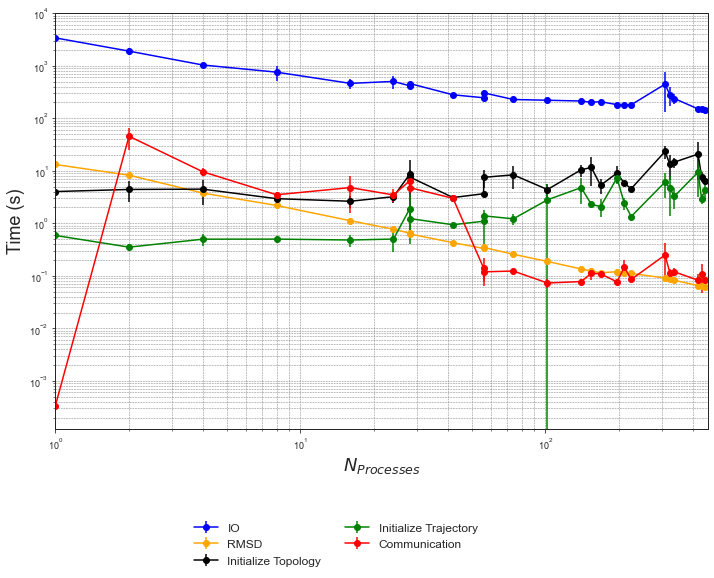

In [84]:
plot_line_means(_mda)

<ipython-input-81-1f9c1e006a8e>:56: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_ylim(0,10000)


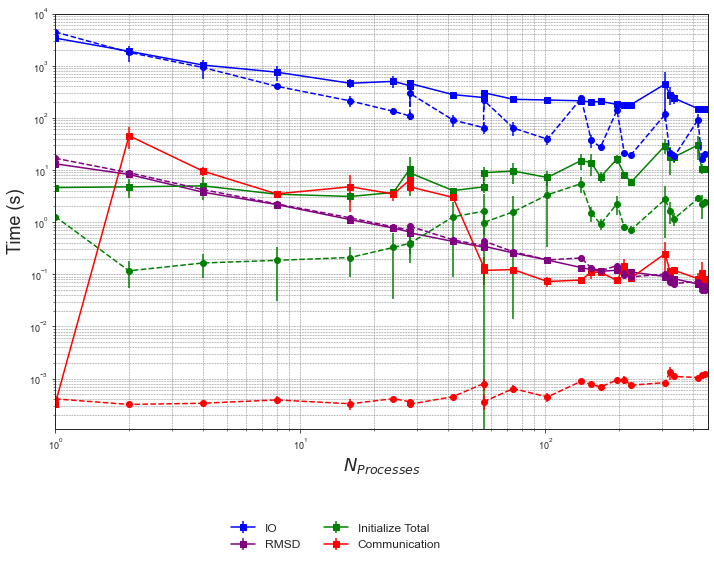

In [85]:
plot_both_lines(_mda, _h5py)

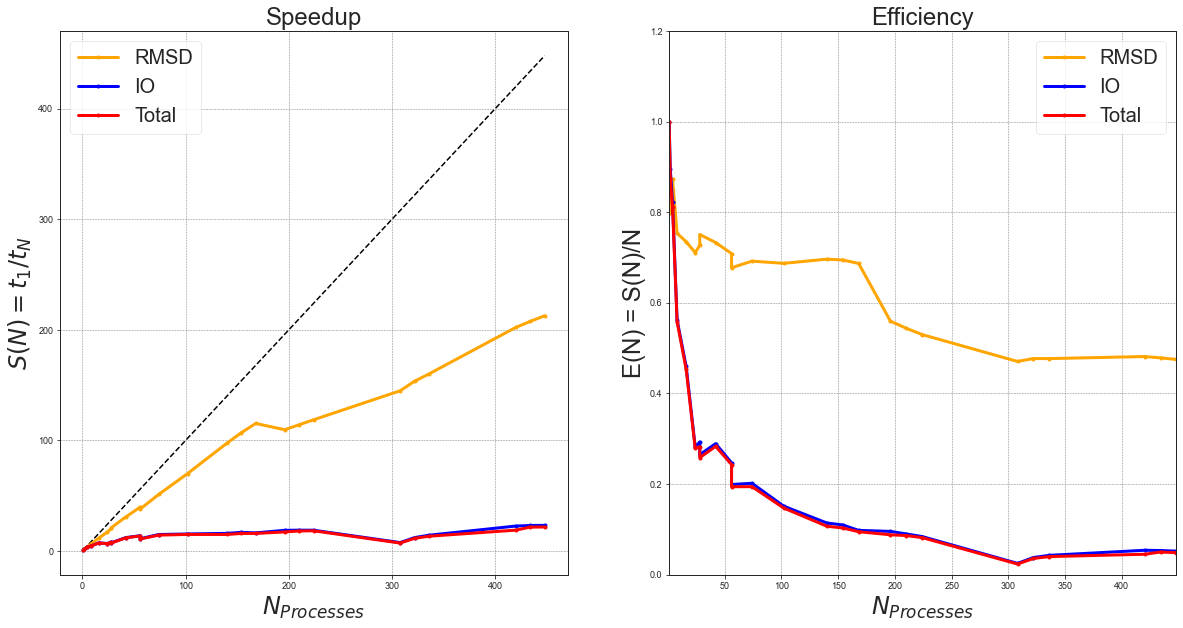

In [86]:
plot_scaling(_mda)

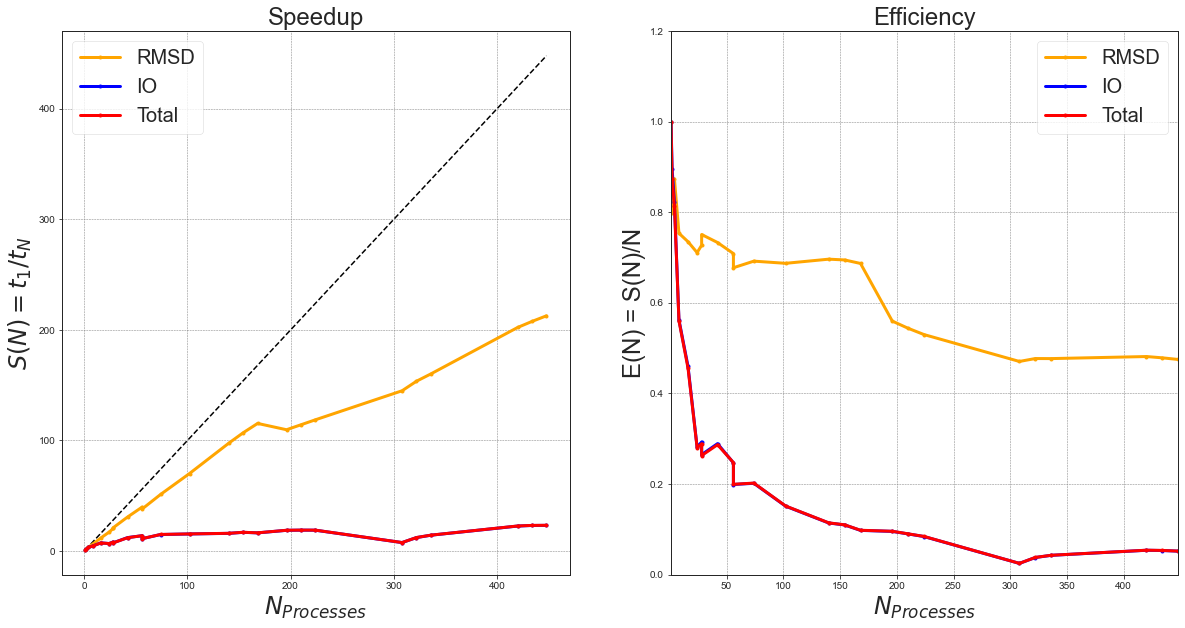

In [87]:
plot_scaling(_mda, init_subtracted=True)

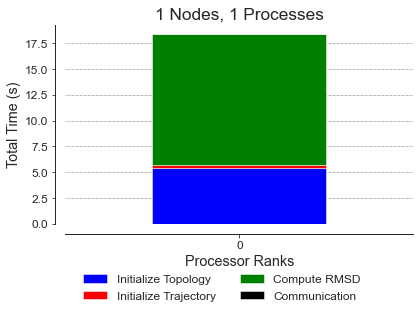

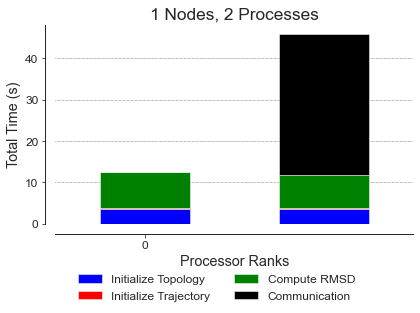

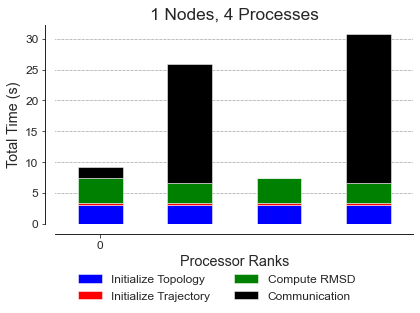

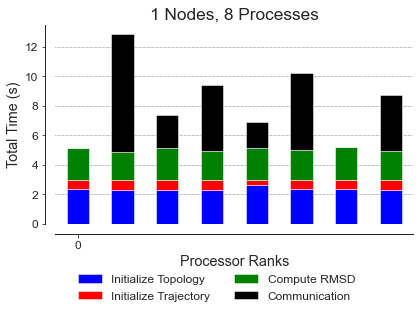

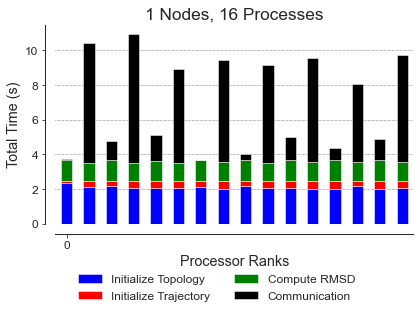

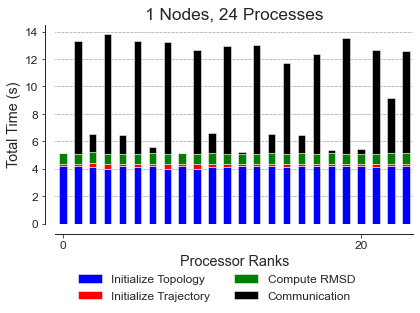

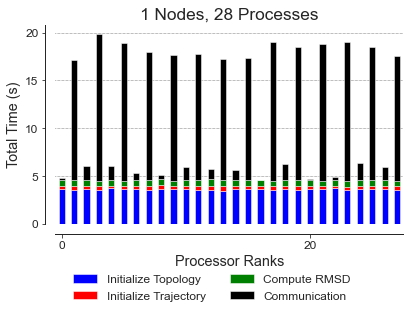

In [95]:
plot_bars(_mda, 1, 1)

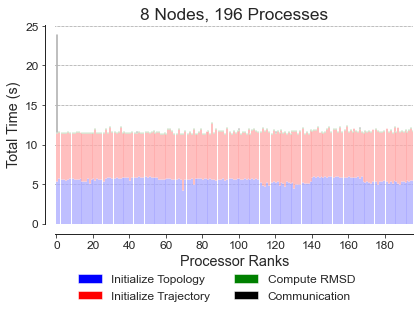

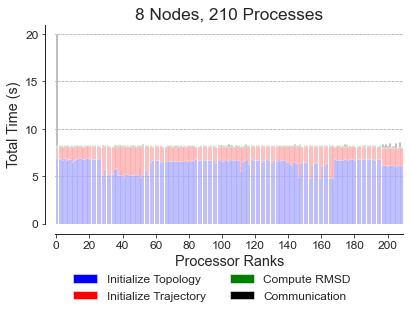

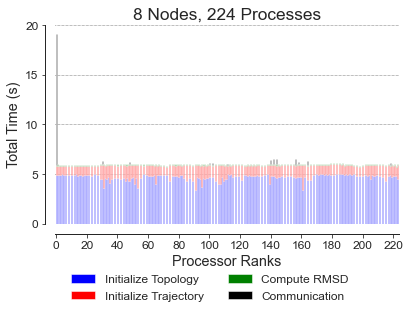

In [94]:
plot_bars(_mda, 8, 1)